In [78]:
"""
Data Modeling
"""
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

# TODO: setup logging

In [79]:
def read_pickle(path):
    """Read a pickle file.
    """
    return pd.read_pickle(path)

In [80]:
def split_data(data):
    # Get the features and target variable.
    X, y = data.iloc[:, 1:-1], data.iloc[:, -1]


    # Split the dataframe in training and testing chuncks.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20220912)

    return X_train, X_test, y_train, y_test


def train_model(X_train, y_train):
    """Split the dataframe in training and testing partitions.
    """

    # Train model.
    distributions = {'n_neighbors' : list(range(1, 31, 2)), 'weights': ['uniform', 'distance']}
    search = RandomizedSearchCV(KNeighborsClassifier(), distributions, random_state=0)
    model = search.fit(X_train, y_train)
    return model.best_estimator_

def test_model(model, X_test, y_test):
    """Test model.
    """
    y_pred = model.predict(X_test)
    return f1_score(y_pred, y_test)


In [81]:
reviews_cv = read_pickle('../data/processed/buscape_counter_vectorized.pkl')
reviews_tv = read_pickle('../data/processed/buscape_tfidf_vectorized.pkl')  
reviews_gv = read_pickle('../data/processed/buscape_glove_s50_vectorized.pkl')

In [82]:
test_scores=[]
X_train_cv, X_test_cv, y_train_cv, y_test_cv = split_data(reviews_cv)
model = train_model(X_train_cv, y_train_cv)
test_scores.append(test_model(model, X_test_cv, y_test_cv))


In [83]:
X_train_tv, X_test_tv, y_train_tv, y_test_tv = split_data(reviews_tv)
model = train_model(X_train_tv, y_train_tv)
test_scores.append(test_model(model, X_test_tv, y_test_tv))


In [84]:
X_train_gv, X_test_gv, y_train_gv, y_test_gv = split_data(reviews_gv)
model = train_model(X_train_gv, y_train_gv)
scores = test_model(model, X_test_gv, y_test_gv)
test_scores.append(test_model(model, X_test_gv, y_test_gv))

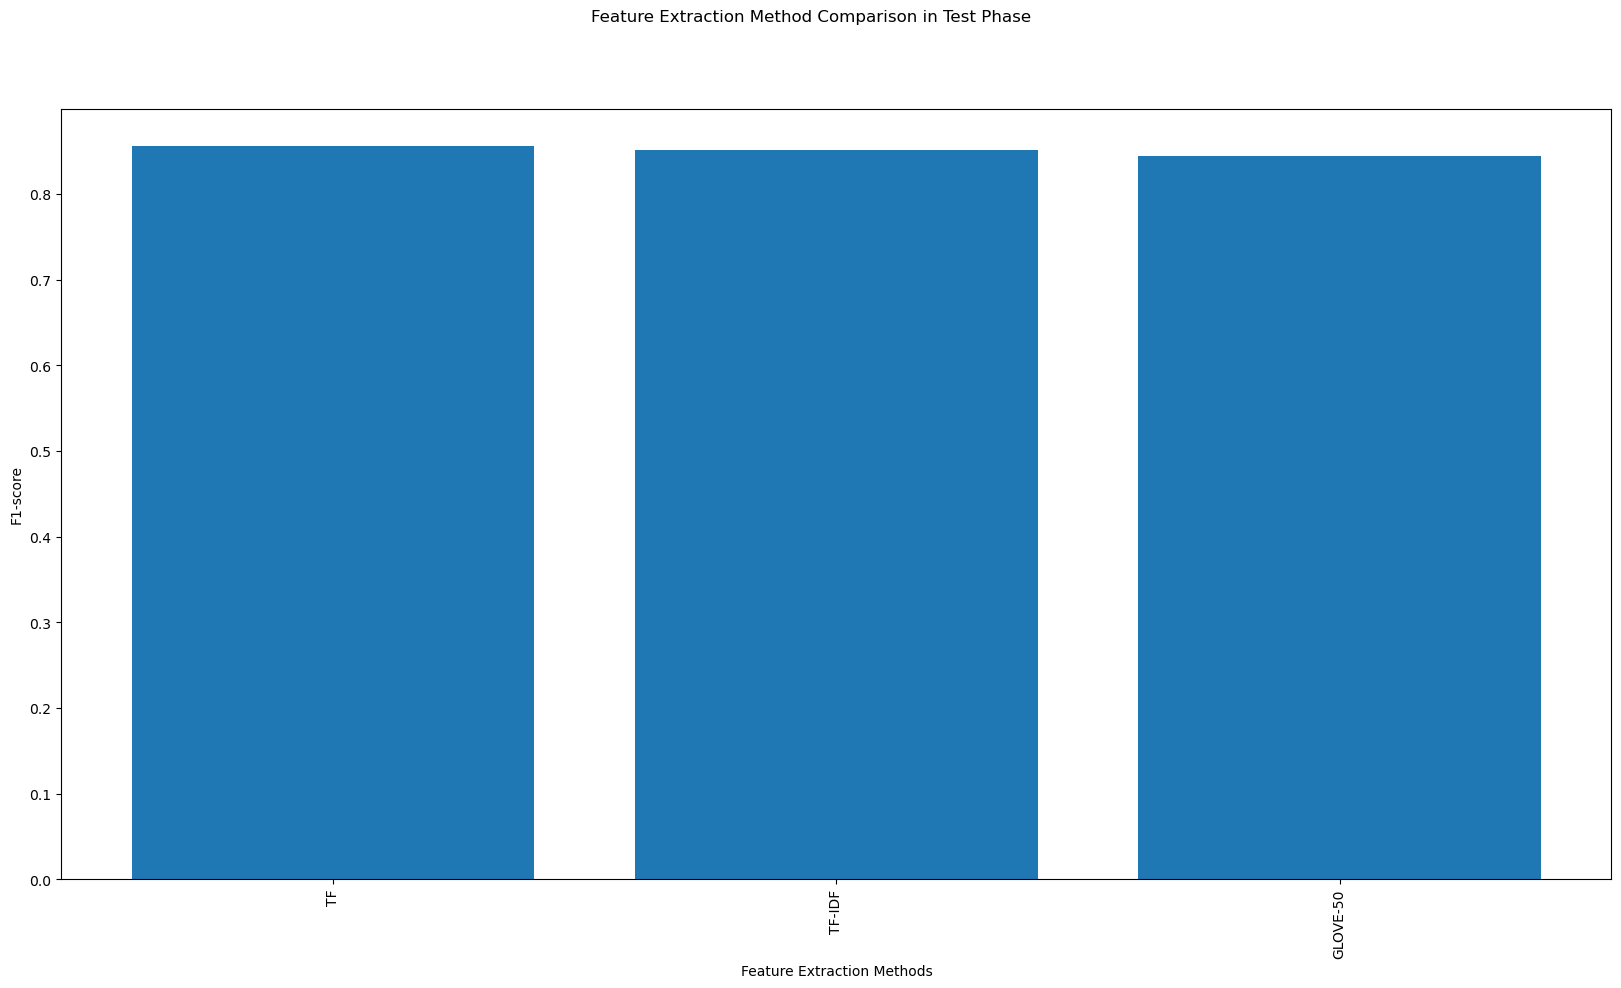

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
fig.suptitle('Feature Extraction Method Comparison in Test Phase')
_ = plt.bar(['TF', 'TF-IDF', 'GLOVE-50'], test_scores)
ax.set_ylabel('F1-score')
ax.set_xlabel('Feature Extraction Methods')
plt.show()